Copyright 2022 Andrew M. Olney and made available under [CC BY-SA](https://creativecommons.org/licenses/by-sa/4.0) for text and [Apache-2.0](http://www.apache.org/licenses/LICENSE-2.0) for code.

# Data cleaning, transformations, & versioning: Problem solving

This session will use the `mpg` dataset, which contains measurements of fuel economy and other properties of cars from the 1970s, to practice data cleaning, transformation, and versioning concept.s

| Variable     | Type     | Description                              |
|:--------------|:----------|:------------------------------------------|
| mpg          | Ratio    | Miles per gallon; fuel economy           |
| cylinders    | Ordinal  | Number of cylinders in engine            |
| displacement | Ratio    | Volume inside cylinders (likely inches)                  |
| horsepower   | Ratio    | Unit of power                            |
| weight       | Ratio    | Weight of car (likely pounds)                           |
| acceleration | Ratio    | Acceleration of car (likely in seconds to 60 MPH) |
| model_year   | Interval | Year of car manufacture; last two digits |
| origin       | Nominal  | Numeric code corresponding to continent  |
| name     | Nominal  | Car model name (ID)                      |

<div style="text-align:center;font-size: smaller">
    <b>Source:</b> This dataset was taken from the StatLib library which is maintained at Carnegie Mellon University.
</div>
<br>

## Missing data

Load `readr`, `dplyr`, `base` and `tidyr` so we can read data into a dataframe and manipulate it.

In [1]:
library(readr)
library(dplyr)
library(tidyr)
library(base)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable><variable id="6C!l+@S8,SvtzakmsxQD">base</variable></variables><block type="import_R" id="q]np1Ju|B`4k*R-zylwU" x="44" y="66"><field name="libraryName" id="_;PP-/]_2fNUR.dyhw(8">readr</field><next><block type="import_R" id="(%@0XC,((6M%4]kj+iDm"><field name="libraryName" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><next><block type="import_R" id="l.:Sc#tFH?#!tX=Zl.4b"><field name="libraryName" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><next><block type="import_R" id="AmB3B[T@UHq1l2P*NjUF"><field name="libraryName" id="6C!l+@S8,SvtzakmsxQD">base</field></block></next></block></next></block></next></block></xml>


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




Load a dataframe with `datasets/mpg-na-hidden.csv` and display it.

In [2]:
dataframe = readr::read_csv("datasets/mpg-na-hidden.csv")

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="-112" y="56"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/mpg-na-hidden.csv</field></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="-114" y="118"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 398 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (8): mpg, cylinders, displacement, horsepower, weight, acceleration, mod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,4,135,84,2370,13.0,82,1,dodge charger 2.2


-----------
**QUESTION:**

Do you think there are any `NaN` values? Why? 

**ANSWER: (click here to edit)**

*Not that I can see*

--------------------

Load `ggplot2` and `psych` so you can plot and get descriptive statistics.

In [3]:
library(ggplot2)
library(psych)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable></variables><block type="import_R" id="NP8di6)Z3BCnEo]0O1DZ" x="-79" y="30"><field name="libraryName" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><next><block type="import_R" id="B;;7fuWo=jw*m)BGOaaV"><field name="libraryName" id="-%rFagMkPz%VG@$q~ANP">psych</field></block></next></block></xml>

Warning message:
“package ‘ggplot2’ was built under R version 4.2.2”

Attaching package: ‘psych’


The following objects are masked from ‘package:ggplot2’:

    %+%, alpha




`describe` the dataframe.

In [4]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="Ik/4b5VaB!,h*!CDG/;:" x="-71" y="128"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="9~!*.^kJ;;#xmnox7F3h"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,398,23.514573,7.8159843,23.0,23.064688,8.89560,9,46.6,37.6,0.45362689,-0.5318741,0.39177989
cylinders,2,398,5.454774,1.7010042,4.0,5.334375,0.00000,3,8.0,5.0,0.52295643,-1.3826240,0.08526364
displacement,3,398,193.425879,104.2698382,148.5,182.820312,86.73210,68,455.0,387.0,0.71422979,-0.7635686,5.22657472
horsepower,4,398,102.894472,40.2695442,92.0,99.175000,29.65200,0,230.0,230.0,0.78196040,0.8001574,2.01852986
weight,5,398,2970.424623,846.8417742,2803.5,2909.640625,945.15750,1613,5140.0,3527.0,0.52706623,-0.8018206,42.44834255
acceleration,6,398,15.568090,2.7576889,15.5,15.507500,2.52042,8,24.8,16.8,0.27667903,0.3821477,0.13823046
model_year,7,398,76.010050,3.6976266,76.0,76.006250,4.44780,70,82.0,12.0,0.01144780,-1.1906087,0.18534528
origin,8,398,1.572864,0.8020549,1.0,1.468750,0.00000,1,3.0,2.0,0.91682483,-0.8333281,0.04020338
name*,9,398,149.550251,89.4958803,151.0,149.359375,118.60800,1,305.0,304.0,0.01852441,-1.2464825,4.48602312


Look at the min, mean, and max.

-----------
**QUESTION:**

Do you think there are any `NA` values? Why and what are they?

**ANSWER: (click here to edit)**

*Horsepower can't be zero*

--------------------

One way to tell if your guess is correct is to plot the variable(s) in question.

Now plot a histogram with the variable(s) in question.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


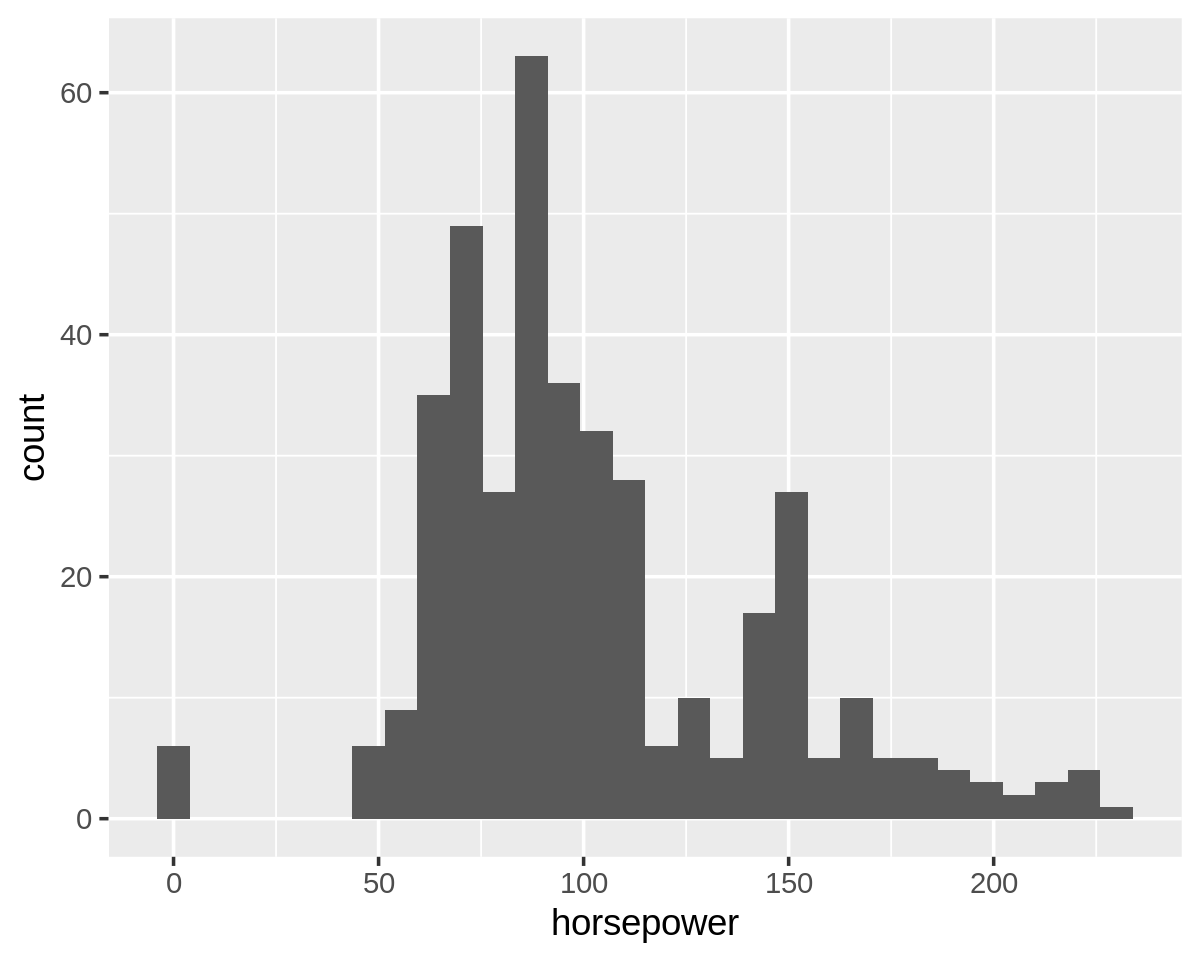

In [5]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=horsepower))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=horsepower)</field></block></value></block></value></block></xml>

Another way to see this is with a boxplot.
Copy the code above, but change `histogram` to `boxplot`.

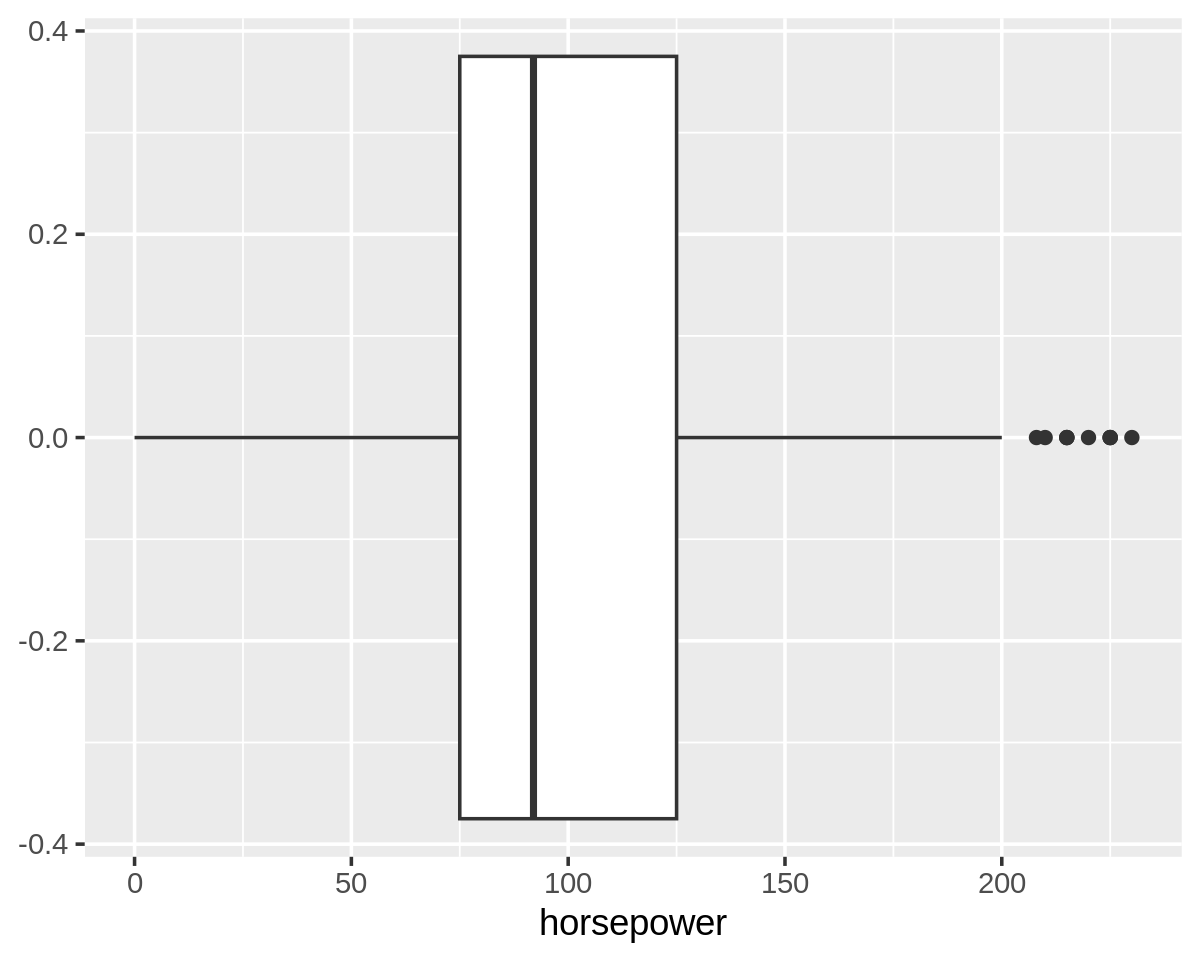

In [6]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_boxplot(aes(x=horsepower))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_boxplot</field><data>ggplot2:geom_boxplot</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=horsepower)</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

Does these plots support your guess?
How do we know this is missing data and not outliers?


**ANSWER: (click here to edit)**

*Yes. Not an outlier because horsepower can't be zero*

--------------------

Load the dataframe again, but this time use `mutate` to replace the value you found with `NA`.

In [7]:
dataframe = readr::read_csv("datasets/mpg-na-hidden.csv") %>%
    dplyr::mutate(across(horsepower,~na_if(.,0)))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="_;PP-/]_2fNUR.dyhw(8">readr</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="variables_set" id="gM*jw`FfIR3)8=g0iEB7" x="-114" y="-24"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="!gwXC?8/[mR7wV[4{{f+"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id=",vaW{t?FHN1~E?+,h!w-"><mutation items="1"></mutation><field name="VAR" id="_;PP-/]_2fNUR.dyhw(8">readr</field><field name="MEMBER">read_csv</field><data>readr:read_csv</data><value name="ADD0"><block type="text" id="dfrpI5b@DHr+DQ:|@vpv"><field name="TEXT">datasets/mpg-na-hidden.csv</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="n023QH9wtPknPa-0N48U"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="]T7_jV(D%wn(Y2f8-zu("><field name="CODE">across(horsepower,~na_if(.,0))</field></block></value></block></value></block></value></block><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B" x="-114" y="118"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

Rows: 398 Columns: 9
── Column specification ────────────────────────────────────────────────────────
Delimiter: ","
chr (1): name
dbl (8): mpg, cylinders, displacement, horsepower, weight, acceleration, mod...

ℹ Use `spec()` to retrieve the full column specification for this data.
ℹ Specify the column types or set `show_col_types = FALSE` to quiet this message.


mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
14,8,454,220,4354,9.0,70,1,chevrolet impala
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
36,4,135,84,2370,13.0,82,1,dodge charger 2.2


-----------
**QUESTION:**

You have two choices at this point: `drop_na` or `replace_na` with another value (like the median).
Which would you do, and why?


**ANSWER: (click here to edit)**

*I'd `dropna` since it's just six rows.*

--------------------

Update the dataframe using whichever of the two options you chose above.

In [9]:
dataframe = tidyr::drop_na(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="%ovw[;dNkqx,|V0M/RZA">tidyr</variable></variables><block type="variables_set" id="i+A-_eU6OKaA+^g34*WE" x="-59" y="163"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="varDoMethod_R" id="pNGkqP{oupFzT?hF@Hq9"><mutation items="1"></mutation><field name="VAR" id="%ovw[;dNkqx,|V0M/RZA">tidyr</field><field name="MEMBER">drop_na</field><data>tidyr:drop_na</data><value name="ADD0"><block type="variables_get" id=";uAzt8X[4a#Jkp.#|6I/"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value></block></xml>

## Transforming data

### Outliers

Filter the values below the 1st percentile and above the 99th percentile for each variable in the dataframe, save this in the dataframe, and display it.

*Hint: Use `where(is.numeric)` because quantiles need numeric variables.*

In [11]:
dataframe = dataframe %>%
    dplyr::filter(if_all(where(is.numeric), ~.x >= quantile(.x,.01) & .x <= quantile(.x,.99)))

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="variables_set" id="({Y/l^eCh/p/81c2CA3!" x="-105" y="84"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="!gwXC?8/[mR7wV[4{{f+"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="dn{+Q#DO%lN;G_tFGJ#B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="n023QH9wtPknPa-0N48U"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">filter</field><data>dplyr:filter</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="]T7_jV(D%wn(Y2f8-zu("><field name="CODE">if_all(where(is.numeric), ~.x &gt;= quantile(.x,.01) &amp; .x &lt;= quantile(.x,.99))</field></block></value></block></value></block></value></block><block type="variables_get" id="5HH,QE!p;!1qfy,Vsi8~" x="-129" y="199"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu
15,8,350,165,3693,11.5,70,1,buick skylark 320
18,8,318,150,3436,11.0,70,1,plymouth satellite
16,8,304,150,3433,12.0,70,1,amc rebel sst
17,8,302,140,3449,10.5,70,1,ford torino
15,8,429,198,4341,10.0,70,1,ford galaxie 500
15,8,383,170,3563,10.0,70,1,dodge challenger se
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
32,4,144,96,2665,13.9,82,3,toyota celica gt


`describe` the dataframe again.

In [12]:
psych::describe(dataframe)

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="-%rFagMkPz%VG@$q~ANP">psych</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="varDoMethod_R" id="Ik/4b5VaB!,h*!CDG/;:" x="-71" y="128"><mutation items="1"></mutation><field name="VAR" id="-%rFagMkPz%VG@$q~ANP">psych</field><field name="MEMBER">describe</field><data>psych:describe</data><value name="ADD0"><block type="variables_get" id="9~!*.^kJ;;#xmnox7F3h"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></xml>

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
mpg,1,359,23.466017,7.3035932,23.0,23.119723,8.1543,11.0,43.1,32.1,0.351010860,-0.8283693,0.38546890
cylinders,2,359,5.451253,1.6603299,4.0,5.318339,0.0000,4.0,8.0,4.0,0.550764764,-1.3352139,0.08762886
displacement,3,359,191.324513,97.4829658,151.0,182.105536,88.9560,71.0,440.0,369.0,0.660494152,-0.8789972,5.14495415
horsepower,4,359,102.420613,33.3285443,92.0,98.941176,26.6868,48.0,215.0,167.0,0.961090219,0.2603685,1.75901329
weight,5,359,2959.899721,799.6829756,2807.0,2905.868512,916.2468,1773.0,4906.0,3133.0,0.481980038,-0.8868501,42.20565321
acceleration,6,359,15.570195,2.4530400,15.5,15.518339,2.2239,9.5,22.2,12.7,0.241113180,-0.1641527,0.12946650
model_year,7,359,76.161560,3.5793595,76.0,76.166090,4.4478,70.0,82.0,12.0,-0.007323062,-1.1149728,0.18891137
origin,8,359,1.551532,0.7959336,1.0,1.442907,0.0000,1.0,3.0,2.0,0.975111454,-0.7273851,0.04200777
name*,9,359,135.779944,81.5228935,137.0,135.716263,108.2298,1.0,276.0,275.0,0.011052595,-1.2474642,4.30261376


-----------
**QUESTION:**

Did the min, mean, and max change?
What about the 25th, 50th (median), and 75th percentiles?
Are you surprised?


**ANSWER: (click here to edit)**

*The min, mean, max all changed slightly.
The listed percentiles did not change, nor did we expect them to.*

--------------------

### Non-normality

Plot a histogram of `displacement`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


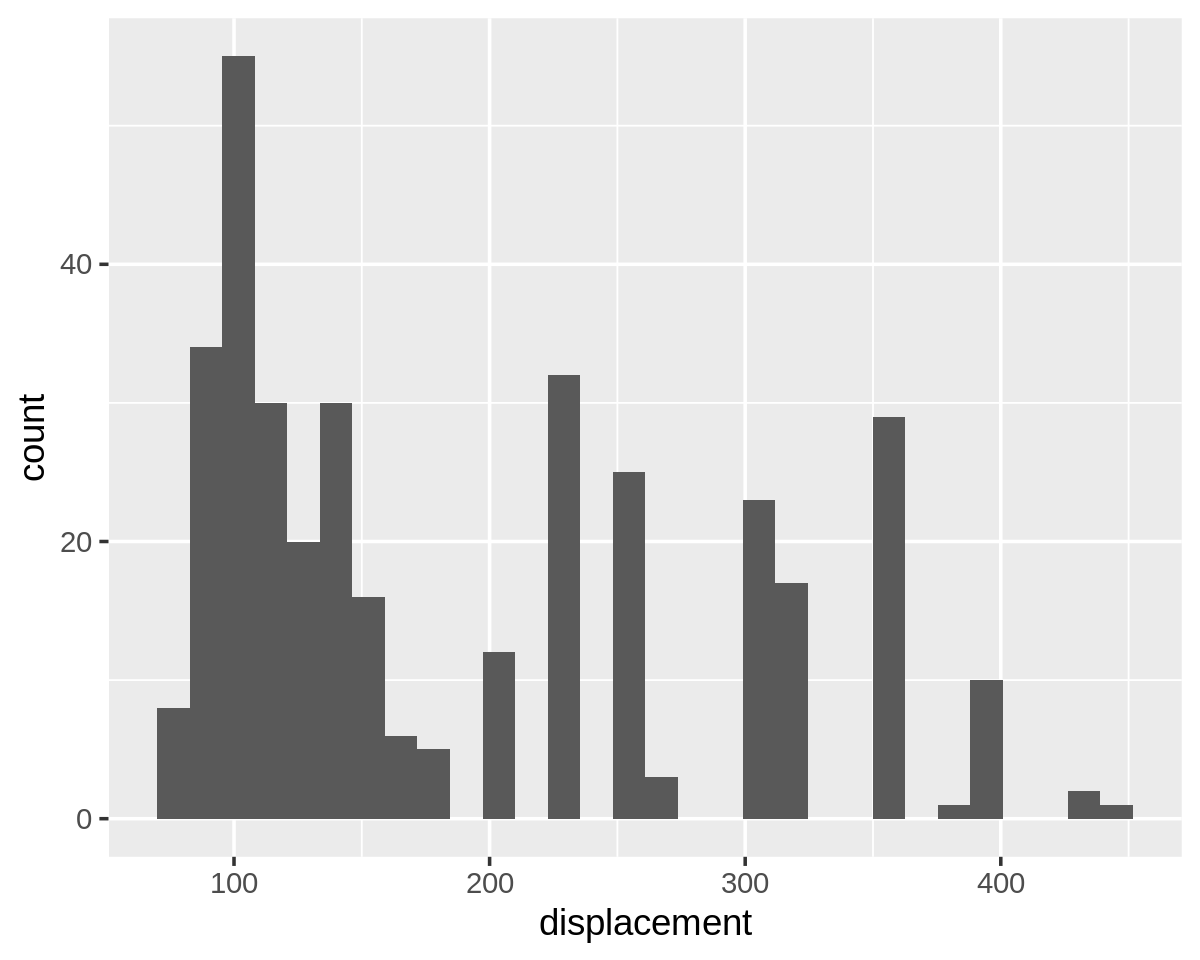

In [13]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=displacement))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=displacement)</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

Suppose we wanted to predict `displacement` in a linear regression.
Should we transform it to make it more normal?


**ANSWER: (click here to edit)**

*Possibly.
It does seem skewed to the right, though I'm not convinced transforming it is the right way to deal with it.*

--------------------

Plot a log transformed `displacement`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


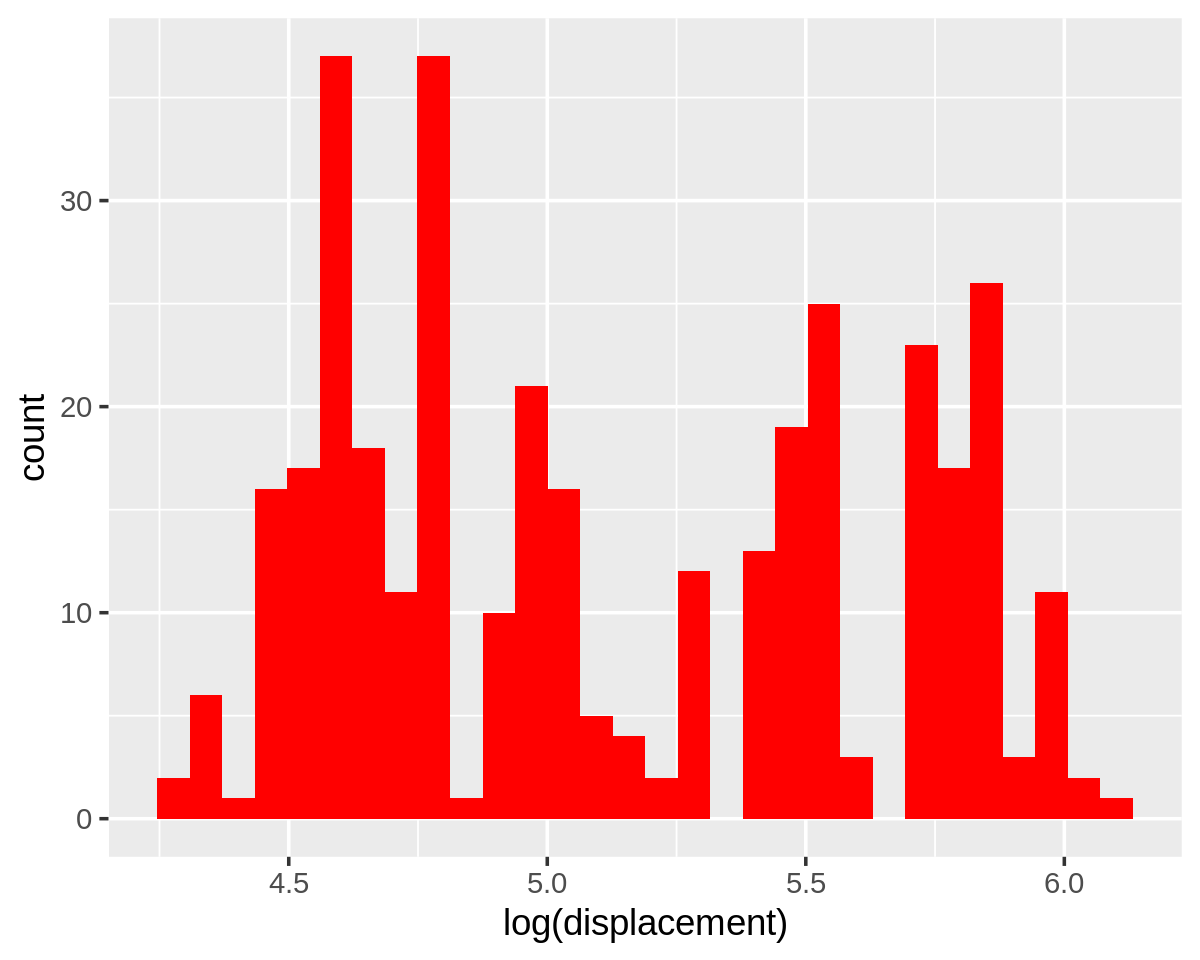

In [16]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=log(displacement)),fill="red")

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=log(displacement)),fill="red"</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

Is this better?
What else might you consider doing?


**ANSWER: (click here to edit)**

*It might be better, but its not clearly better.
It almost looks like it is bimodal now (with two peaks).
I wonder if we should create a new varible that reflects these peaks, which would be a binary variable like `sportscar`=Yes or No*

--------------------

## Create new variables

Create a new variable `ratio` in the dataframe that is `weight` divided by `horsepower`.
This is called the power to weight ratio.

In [17]:
dataframe = dataframe %>%
    dplyr::mutate(ratio=weight/horsepower)

dataframe

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable><variable id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</variable></variables><block type="variables_set" id="}~8wvntHNzK`D7?4[i95" x="-90" y="128"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field><value name="VALUE"><block type="pipe_R" id="`Bm.KNFiVf-}0;d26:q|"><mutation items="1"></mutation><value name="INPUT"><block type="variables_get" id="9~!*.^kJ;;#xmnox7F3h"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value><value name="ADD0"><block type="varDoMethod_R" id="qU#{2.8b*0MBp^At${*/"><mutation items="1"></mutation><field name="VAR" id="`IEAx*Bh}E,Y}mK;jr;{">dplyr</field><field name="MEMBER">mutate</field><data>dplyr:mutate</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="VIe$YhiCCS{xIPni|h|{"><field name="CODE">ratio=weight/horsepower</field></block></value></block></value></block></value></block><block type="variables_get" id="zu3|.8:_(],=,YLXLb_]" x="-70" y="244"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></xml>

mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name,ratio
<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>
18,8,307,130,3504,12.0,70,1,chevrolet chevelle malibu,26.95385
15,8,350,165,3693,11.5,70,1,buick skylark 320,22.38182
18,8,318,150,3436,11.0,70,1,plymouth satellite,22.90667
16,8,304,150,3433,12.0,70,1,amc rebel sst,22.88667
17,8,302,140,3449,10.5,70,1,ford torino,24.63571
15,8,429,198,4341,10.0,70,1,ford galaxie 500,21.92424
15,8,383,170,3563,10.0,70,1,dodge challenger se,20.95882
⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮,⋮
32,4,144,96,2665,13.9,82,3,toyota celica gt,27.76042


Compare `ratio` to `weight` and `horsepower` in three plots.

First, plot the histogram of weight.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


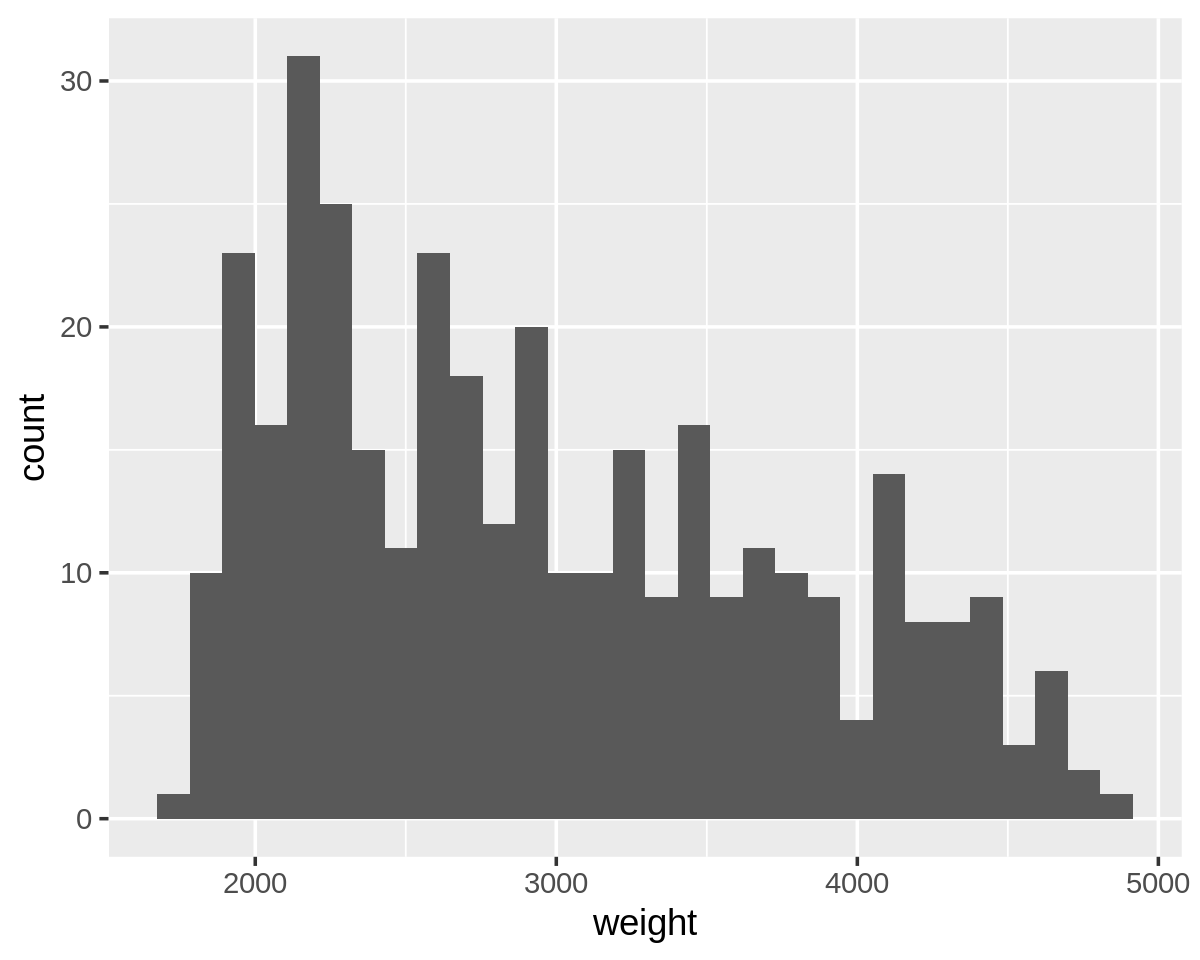

In [18]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=weight))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=weight)</field></block></value></block></value></block></xml>

Next plot the histogram of `horsepower`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


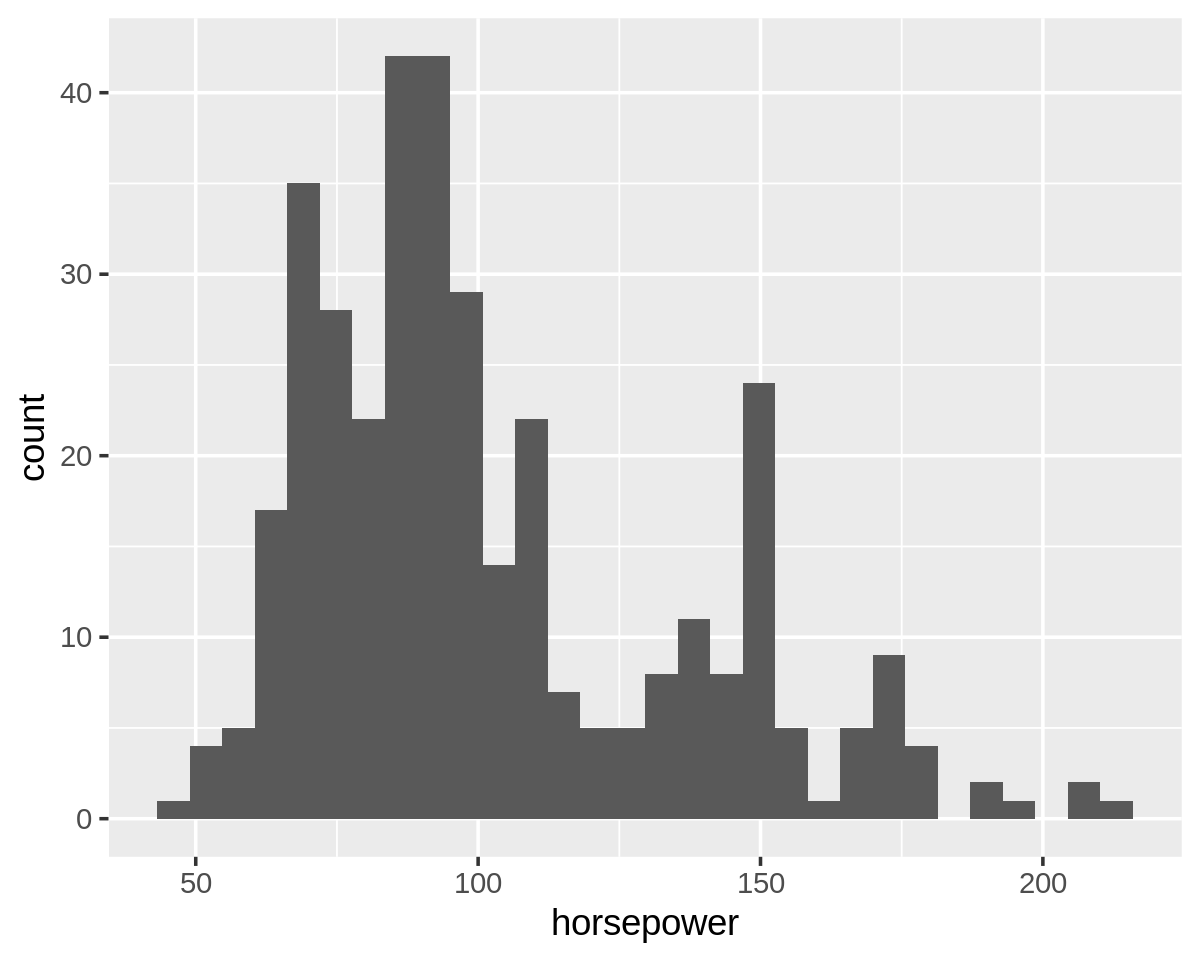

In [19]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=horsepower))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=horsepower)</field></block></value></block></value></block></xml>

Finally plot the histogram of `ratio`.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


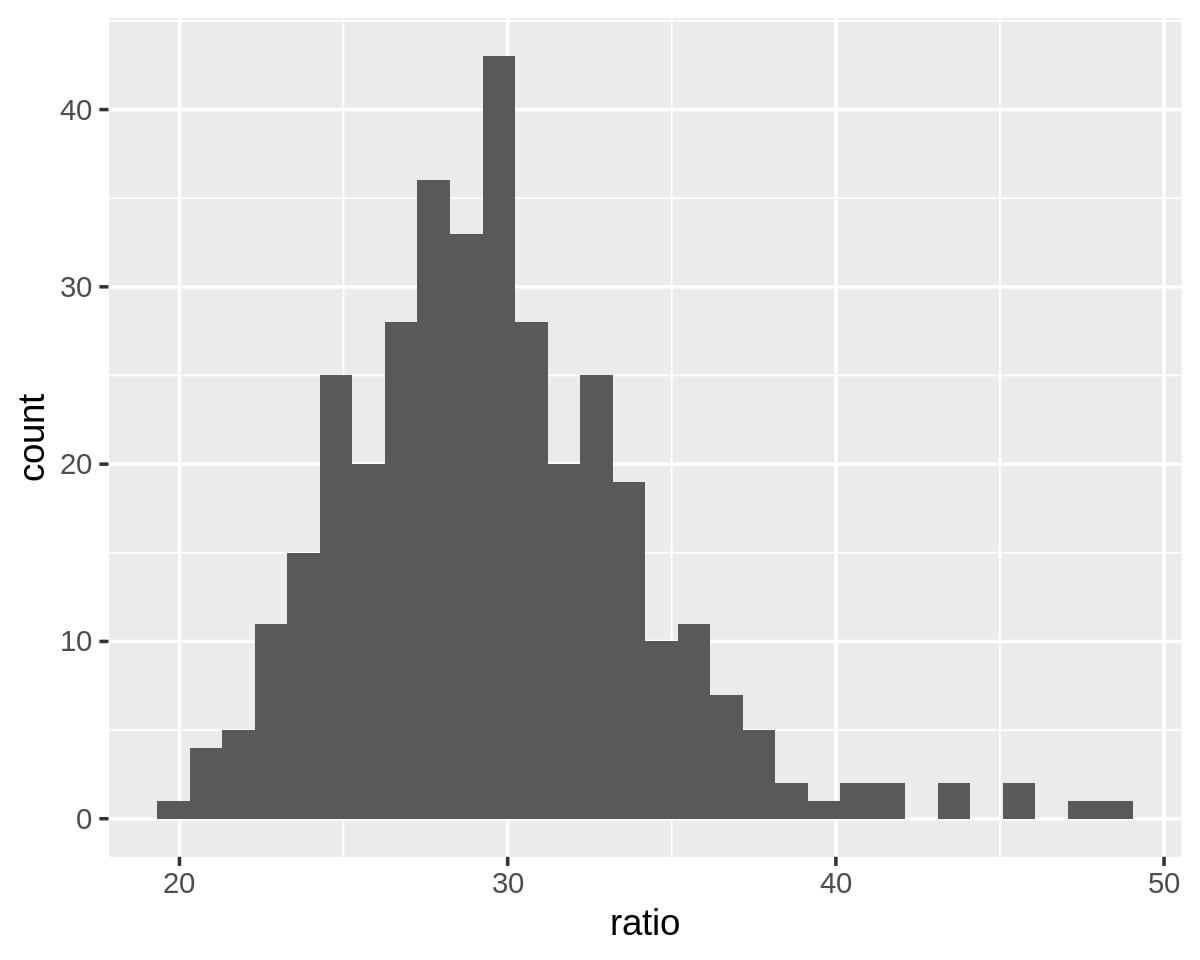

In [20]:
ggplot2::ggplot(dataframe) +
    ggplot2::geom_histogram(aes(x=ratio))

#<xml xmlns="https://developers.google.com/blockly/xml"><variables><variable id="K2WB)HAgulDnN4.esuaK">ggplot2</variable><variable id="(*,(U(rm+VG0+vg;w$65">dataframe</variable></variables><block type="ggplot_plus_R" id="bD~/Zx-C[msh!]*Bk0Ff" x="-98" y="163"><mutation items="1"></mutation><value name="INPUT"><block type="varDoMethod_R" id="(FrPTO6BHQ:/bS2i=Xor"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">ggplot</field><data>ggplot2:ggplot</data><value name="ADD0"><block type="variables_get" id="CX]}YnAcF,:0n3,#Y%(B"><field name="VAR" id="(*,(U(rm+VG0+vg;w$65">dataframe</field></block></value></block></value><value name="ADD0"><block type="varDoMethod_R" id="=A2TJ~wLjW;KweUAV2J!"><mutation items="1"></mutation><field name="VAR" id="K2WB)HAgulDnN4.esuaK">ggplot2</field><field name="MEMBER">geom_histogram</field><data>ggplot2:geom_histogram</data><value name="ADD0"><block type="dummyOutputCodeBlock_R" id="45Q~]AWbZS/H)yTX%[*z"><field name="CODE">aes(x=ratio)</field></block></value></block></value></block></xml>

-----------
**QUESTION:**

What can you say about the distributions of variables in these three plots?
How does it make you feel about `ratio`?


**ANSWER: (click here to edit)**

*The first two plots are not particularly normal, but `ratio` is.
This makes me think that `ratio` is picking up on an interesting property of the data: heavier cars need bigger engines just to move themselves, and we seem to need 1 hp for every 30lbs of vehicle for car-like performance.*

--------------------

## Versioning

Try to make a commit using your current workspace. 

-----------
**QUESTION:**

Was there anything about your workspace in `git` that surprised you?


**ANSWER: (click here to edit)**

*It appears the notebooks are already in `git` with an extensive history.*

--------------------

<!--  -->